# Ford GoBike System Data - Part 1(Exploration)
## By Shahad asseri

## Preliminary Wrangling

The chosen dataset contains trip data from 2013-2018 information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, The dataset can be found in Ford GoBike website.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
# Load the datasets for the year 2017:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [10]:
# Check the number of rows and columns:
df.shape

(519700, 13)

In [11]:
# Check the data type of the dataset:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

### Wrangling data:

In [20]:
# copy the dataset befor Wrangling the data:
df_clean = df.copy()

In [21]:
# Check the null values of the dataset:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

As seen the dataset hasn't null values.

In [22]:
# Check the duplicated of the values in the dataset:
df_clean.duplicated().sum()

0

As seen the dataset has no duplicated.

In [23]:
# Change the value of user_type to more meaningful names:
df_clean.user_type.replace(['Customer', 'Subscriber'], ['Casual', 'Member'], inplace=True)

In [24]:
# Check the result of change the values name:
df_clean['user_type'].unique()

array(['Casual', 'Member'], dtype=object)

In [38]:
# Check the description of the values in the dataset:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [77]:
# Before start ,I need to create a month and a day columns to perform my process:

# Convert start_time to Datetime to extract the month:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

# Now I can extract the Day in the column:
df_clean['day'] = df_clean['start_time'].dt.strftime('%a')
# Now I can extract the month in the column:
df_clean['month']= df_clean['start_time'].dt.strftime('%b')


In [79]:
# Check the change of dataset afte adding the month and a day columns:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,duration_hour,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Casual,Dec,22.252778,Sun
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Casual,Dec,21.888889,Sun
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Casual,Dec,12.713333,Sun
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Casual,Dec,17.270000,Sun
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Member,Dec,12.111944,Sun


### What is the structure of your dataset?

- The chosen dataset includes 519700 trips(rows) with 13 features (columns) as below: 
trip duration in seconds , start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type.
- Most variables are **numeric** as shown:(duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id).
- while (start_time,end_time,start_station_name,end_station_name,user_type) are string object.
### What is/are the main feature(s) of interest in your dataset?

1. What is The month that provides the most service
2. What is the distribution of the user type variable

3. Does being a customer or subscriber differ in the average time duration of driving a bicycle
3. What is The relationship between trip duration and seasons


5. How does the average trip duration diff between the user based on the day of the week
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The Trip duration and The user type.

### Exploration

## Univariate Exploration

In this section,I'm going to Investigate distributions of individual variables
1. Month
2. distribution

#### What is The month that provides the most service:

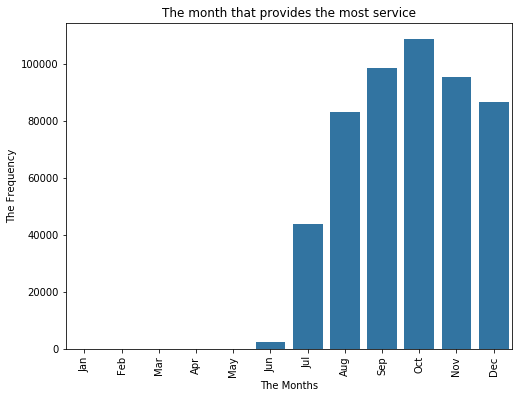

In [49]:
# Create a variable for month:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                 'Sep', 'Oct', 'Nov', 'Dec']

# Create a figure with a specific size:
plt.figure(figsize=[8,6]) 

# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]

# Plot the month that provides the most service:
sb.countplot(data = df_clean, x='month', order=months, color=base_color)
 
# Put the labels:
plt.title('The month that provides the most service')
plt.xlabel('The Months')
plt.ylabel('The Frequency')
plt.xticks(rotation = 90) 

# Show the plot:
plt.show();

As shown, the **October** month is the most month that provides more of rides

 #### What is the distribution of the user type variable:

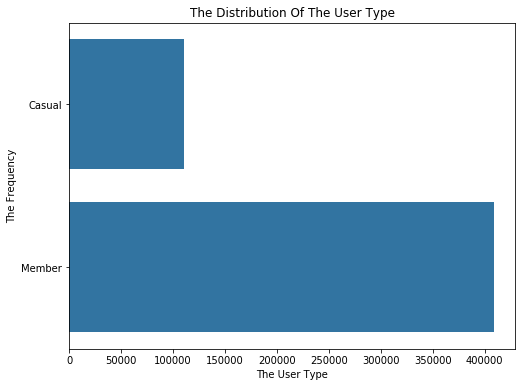

In [53]:
# Create a figure with a specific size:
plt.figure(figsize = [8, 6])

# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]

# Plot the distribution of the user type variable:
sb.countplot(data = df_clean, y = 'user_type', color = base_color);

# Put the labels:
plt.title("The Distribution Of The User Type")
plt.xlabel("The User Type")
plt.ylabel("The Frequency")

# Show the plot:
plt.show();

As shown, the **Member** is the most frequent.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The October month is the most month that provides more of rides
- The Member is the most frequent.

- No, I don't need to perform any transformations,everything was normal.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- As I said befor, everything was normal I don't need to perform any transformations or change.
- The data was clean and tidy

## Bivariate Exploration

In this section,I'm going to Investigate relationships between pairs of variables
1. duration_sec ,user_type
2. trip duration , seasons

#### Does being a customer or subscriber differ in the average time duration of driving a bicycle:

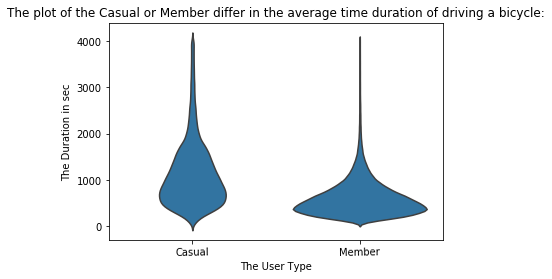

In [60]:
# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]
# Plot the customer or subscriber differ in the average time duration of driving a bicycle
sb.violinplot(data = df.query("duration_sec <= 4039.5"),x = 'user_type',y='duration_sec',color = base_color,inner=None);

# Put the labels:
plt.title("The plot of the Casual or Member differ in the average time duration of driving a bicycle:")
plt.xlabel("The User Type")
plt.ylabel("The Duration in sec")

plt.xticks(rotation=1);

- There is higer concentration customers that a high travel duration (1500~s - 4000s) than subscriber
- There is higer concentration subscriber that a low travel duration (0~ - 750~s) than customers

So, yes it does make a diffrence in the average duration time.

#### What is The relationship between trip duration and seasons:

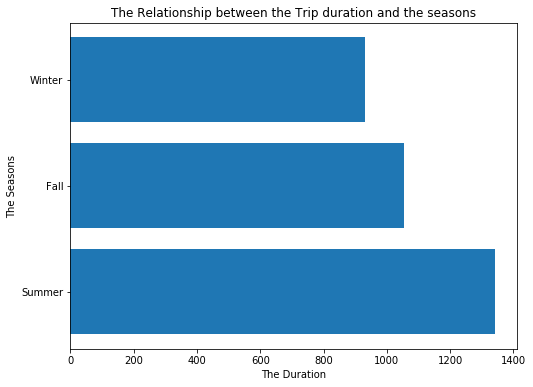

In [71]:
# Create variables for seasons:
Summer = df_clean.query('month in ["Jun" , "Jul" , "Aug"] ').duration_sec.mean() 

Fall = df_clean.query('month in ["Sep" , "Novr" , "Dec"] ').duration_sec.mean()

Winter = df_clean.query('month in ["Dec" , "Jan" , "Feb"]' ).duration_sec.mean()

Spring = df_clean.query('month in ["Mar" , "Apr" , "May"]' ).duration_sec.mean()

# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]

# Create a figure with a specific size:
plt.figure(figsize = [8, 6])

# Plot the relationship between trip duration and seasons:
plt.barh(['Summer','Fall','Winter','Spring'],[Summer,Fall,Winter,Spring],color = base_color )
# Put the labels:
plt.title("The Relationship between the Trip duration and the seasons")
plt.xlabel("The Duration")
plt.ylabel("The Seasons")

# Show the plot:
plt.show();

As shown, the weather is a factor of the efficacious since its effects on the trip duration, So, the **Summer** is the top of the seasons.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- I notice that in genera,There is higer concentration customers that a high travel duration (1500s - 4000s) than subscriber and There is higer concentration subscriber that a low travel duration (0 - 750s) than customers. So, yes it does make a diffrence in the average duration time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- In the seasons plot that Summer season has the longest trip duration.

## Multivariate Exploration

 In this section,I'm going to Investigate relationships between three or more variables.
 1. duration_hour,duration_sec,user_type

#### How does the average trip duration diff between the user based on the day of the week:

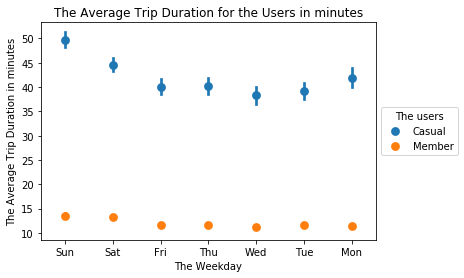

In [21]:
# Create the duration_min column:
df_clean['duration_min'] = df_clean['duration_sec'] /60  # Divid to git sec to mins

# Plot the average trip duration diff between the user based on the day of the week in minutes:
the_plot_min= sb.pointplot(x="day", y="duration_min", hue="user_type",data=df_clean,linestyles="")

# Put the labels:
plt.xlabel('The Weekday');
plt.title('The Average Trip Duration for the Users in minutes')
plt.ylabel('The Average Trip Duration in minutes');

# Put the labels:
the_plot_min.legend(title='The users',loc='center left', bbox_to_anchor=(1, 0.5))

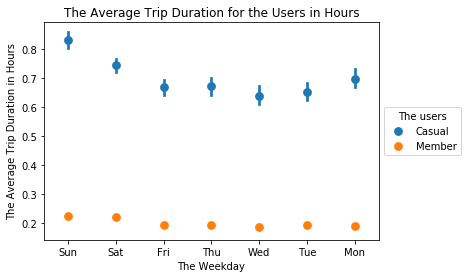

In [23]:
# Create the duration_hour column:
df_clean['duration_hour'] = df_clean['duration_sec'] /3600 # Divid to git sec to hrs 

# Plot the average trip duration diff between the user based on the day of the week in hours:
the_plot_hrs=sb.pointplot(x="day", y="duration_hour", hue="user_type",data=df_clean,linestyles="")

# Put the labels:
plt.xlabel('The Weekday');
plt.title('The Average Trip Duration for the Users in Hours')
plt.ylabel('The Average Trip Duration in Hours');

# Put the legend:
the_plot_hrs.legend(title='The users',loc='center left', bbox_to_anchor=(1, 0.5))

As shown,The Casual users take longer trips than member users in terms of average hours and minuts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
 
The Casual users take longer trips than member users in terms of average hours and minuts.
### Were there any interesting or surprising interactions between features?

I was interested and also surprised because I didn't expect to see the Casual has longer trips than membern.